In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.interpolate import UnivariateSpline

In [2]:
with open("lpf_sensor_data.pkl", "rb") as f:
    sensor_data = pickle.load(f)

In [ ]:
interpolation_funcs = {}

for mat in range(2):
    interpolation_funcs[f"mat_{mat}"] = {}
    for sensor in range(8):
        interpolation_funcs[f"mat_{mat}"][sensor] = {}
        for heater in range(10):
            heater_step = sensor_data[f"mat_{mat}"][sensor][heater]
            filtered = heater_step["Filtered"].values
            time = heater_step["Time Since PowerOn"].values
            # print(mat, sensor, heater)
            interpolation_func = UnivariateSpline(time, filtered)
            interpolation_funcs[f"mat_{
                mat}"][sensor][heater] = interpolation_func

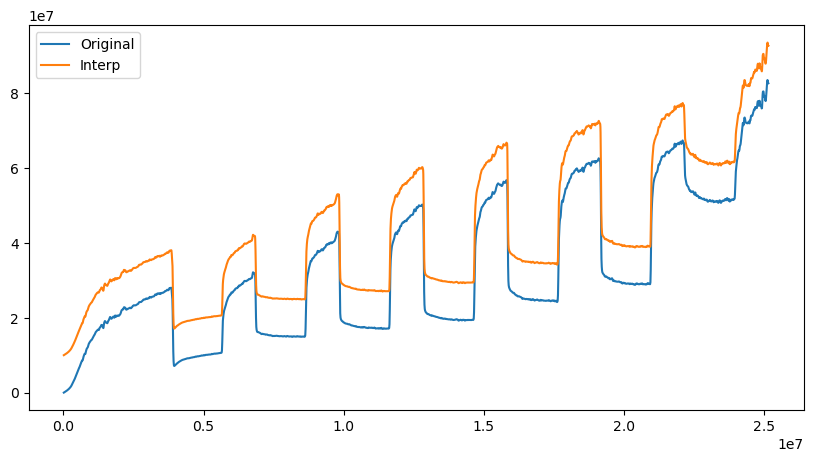

In [16]:
mat = 0
sensor = 1
heater_step = 5
heater = sensor_data[f"mat_{mat}"][sensor][heater_step]
gas_data = heater["Filtered"].values
time = heater["Time Since PowerOn"].values
interpolation_func = interpolation_funcs[f"mat_{mat}"][sensor][heater_step]
interpolated_time = np.linspace(time[0], time[-1], len(time) * 2)
interpolated_data = interpolation_func(interpolated_time)

plt.figure(figsize=(10, 5))
plt.plot(time, gas_data, label="Original")
plt.plot(interpolated_time, interpolated_data + 1e7, label="Interp")
# plt.yscale("log")
plt.legend()
plt.show()

In [15]:
with open("interpolation_functions.pkl", "wb") as f:
    pickle.dump(interpolation_funcs, f)